In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score
color_pal=sns.color_palette()

In [2]:
df=pd.read_csv('product c.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [3]:
sales_c= df.drop(['Product Name','Product Category','Month'],axis=1)

In [4]:
sales_c

,Year,Sales,Market Size,Marketing Expense,Month No.
Month-Year,,,,,
2019-01-01,2019,496334,1002744,1578266,1
2019-02-01,2019,306455,619142,974480,2
2019-03-01,2019,476270,962208,1514466,3
2019-04-01,2019,628463,1269687,1998416,4
2019-05-01,2019,366750,740950,1166209,5
2019-06-01,2019,352324,711811,1120336,6
2019-07-01,2019,657300,1327952,2090113,7
2019-08-01,2019,429552,867822,1365910,8
2019-09-01,2019,499906,1009971,1589625,9


<Axes: title={'center': 'Product C'}, xlabel='Month-Year'>

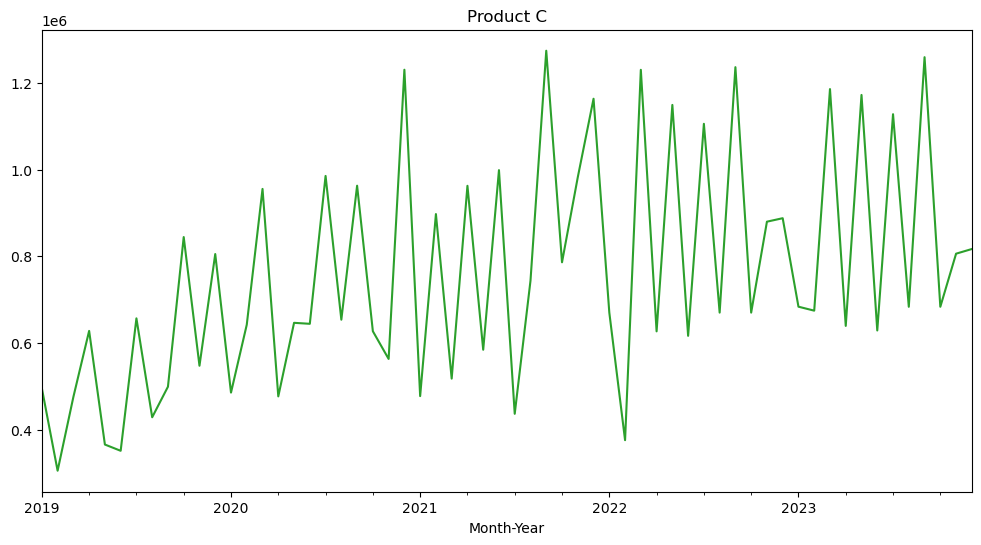

In [5]:
sales_c['Sales'].plot(figsize=(12,6),color=color_pal[2],title='Product C')

<Axes: ylabel='Frequency'>

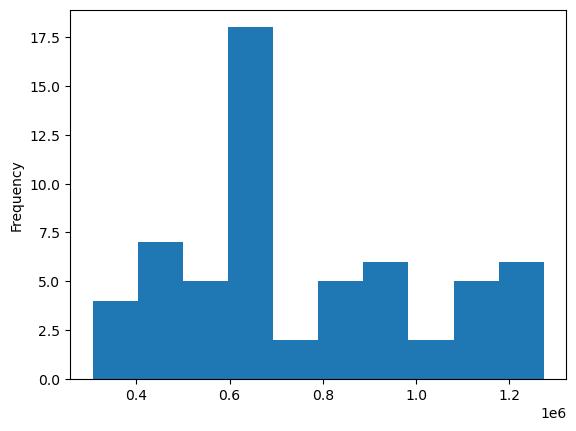

In [6]:
sales_c['Sales'].plot(kind='hist')

# Visualization

In [7]:
sales_c.head()

,Year,Sales,Market Size,Marketing Expense,Month No.
Month-Year,,,,,
2019-01-01,2019,496334,1002744,1578266,1
2019-02-01,2019,306455,619142,974480,2
2019-03-01,2019,476270,962208,1514466,3
2019-04-01,2019,628463,1269687,1998416,4
2019-05-01,2019,366750,740950,1166209,5


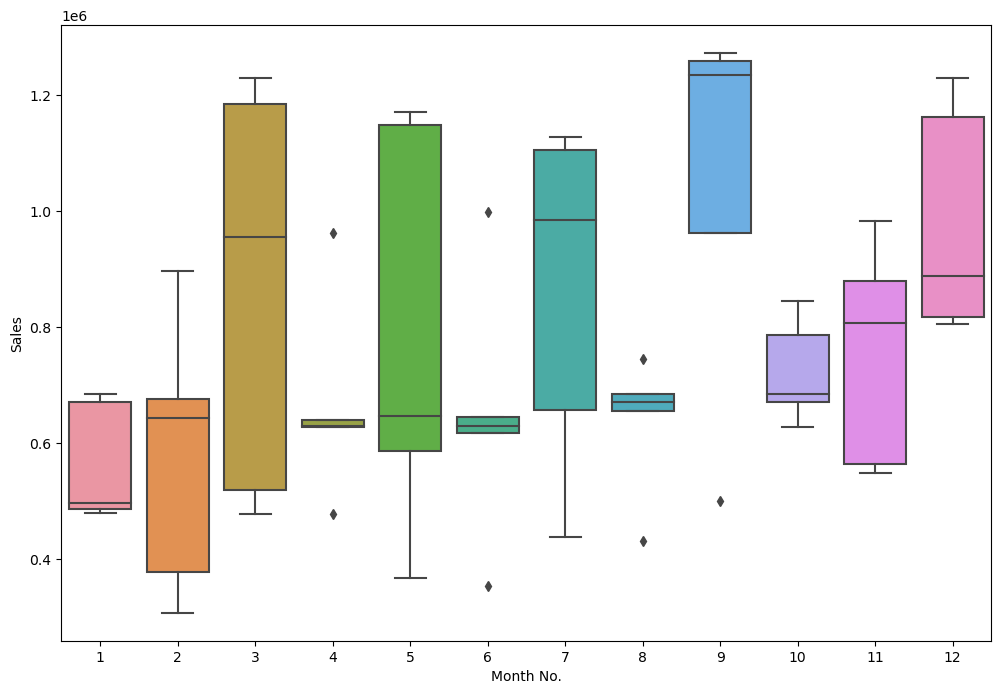

In [8]:
plt.figure(figsize=(12,8))
sns.boxplot(data=sales_c, x='Month No.',y='Sales')
plt.show()

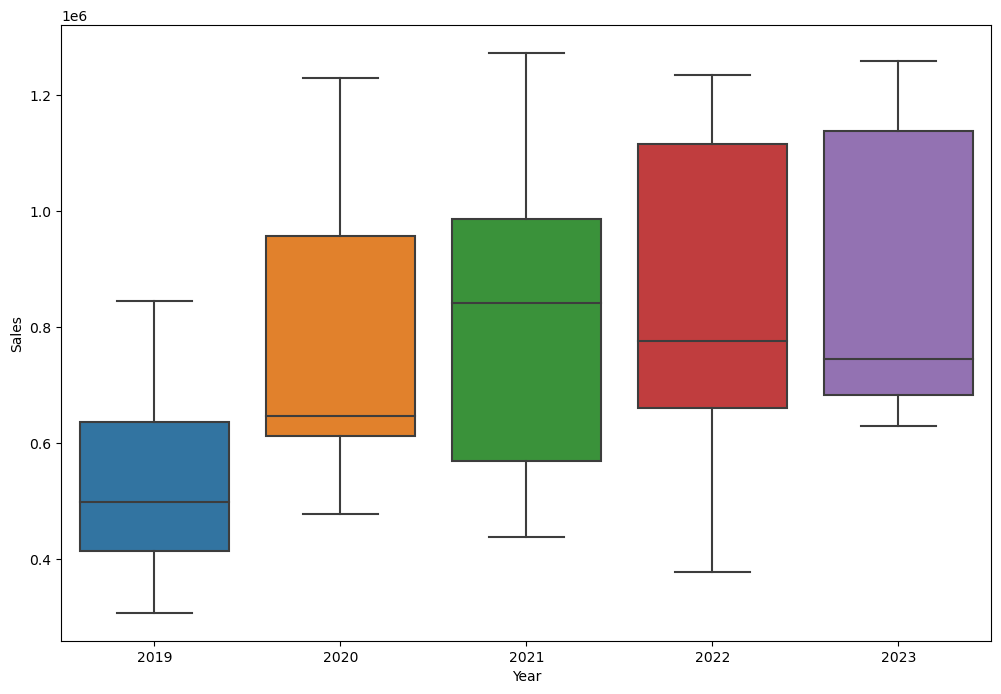

In [9]:
plt.figure(figsize=(12,8))
sns.boxplot(data=sales_c, x='Year',y='Sales')
plt.show()

# Feature Engineering

In [10]:
sales_c= df.drop(['Product Name','Product Category','Month','Month No.','Year'],axis=1)

In [11]:
sales_c['quarter'] = sales_c.index.quarter
sales_c['month'] = sales_c.index.month
sales_c['year'] = sales_c.index.year

In [12]:
# Create lagged values
lagged_intervals = [3, 4, 5]  # Lagged intervals in months
for lag in lagged_intervals:
    sales_c[f'sales_lag_{lag}'] = sales_c['Sales'].shift(lag)

In [13]:
print(sales_c)

              Sales  Market Size  Marketing Expense  quarter  month  year  \
Month-Year                                                                  
2019-01-01   496334      1002744            1578266        1      1  2019   
2019-02-01   306455       619142             974480        1      2  2019   
2019-03-01   476270       962208            1514466        1      3  2019   
2019-04-01   628463      1269687            1998416        2      4  2019   
2019-05-01   366750       740950            1166209        2      5  2019   
2019-06-01   352324       711811            1120336        2      6  2019   
2019-07-01   657300      1327952            2090113        3      7  2019   
2019-08-01   429552       867822            1365910        3      8  2019   
2019-09-01   499906      1009971            1589625        3      9  2019   
2019-10-01   844520      1107516            1743167        4     10  2019   
2019-11-01   548192      1627136            2561020        4     11  2019   

# Train/Test Split

In [14]:
train= sales_c[:57]
test=sales_c[57:]

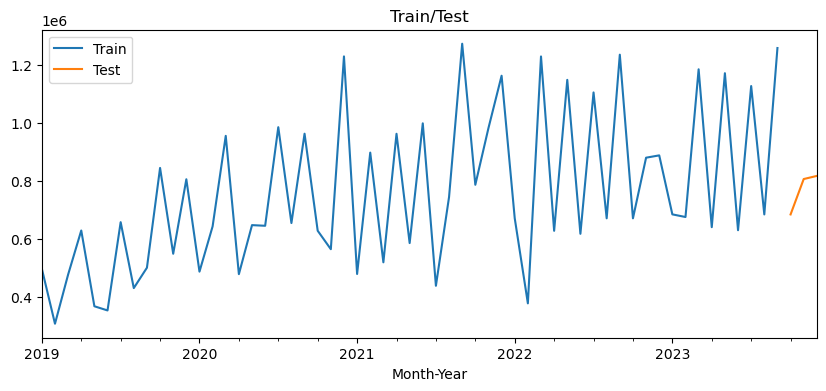

In [15]:
fig,ax=plt.subplots(figsize=(10,4))
train['Sales'].plot(ax=ax,label='Train set',title='Train/Test')
test['Sales'].plot(ax=ax,label='Test set')
plt.legend(['Train','Test'])
plt.show()

In [16]:
train.tail()

,Sales,Market Size,Marketing Expense,quarter,month,year,sales_lag_3,sales_lag_4,sales_lag_5
Month-Year,,,,,,,,,
2023-05-01,1171761,2052183,572015,2,5,2023,675038.0,684175.0,887916.0
2023-06-01,629400,1102308,307252,2,6,2023,1185258.0,675038.0,684175.0
2023-07-01,1127413,1974516,550365,3,7,2023,639923.0,1185258.0,675038.0
2023-08-01,683935,1197820,333874,3,8,2023,1171761.0,639923.0,1185258.0
2023-09-01,1258717,2204473,614464,3,9,2023,629400.0,1171761.0,639923.0


In [17]:
x_train = train.drop(columns=['Sales'])
y_train=train['Sales']
x_test=test.drop(columns=['Sales'])
y_test=test['Sales']

In [18]:
from sklearn.model_selection import GridSearchCV


# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.001,0.01, 0.1, 0.2],
    'n_estimators': [100, 500, 1000, 2000],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'subsample': [0.7, 0.8, 0.9, 1.0]
}

# Instantiate the XGBoost regressor
regressor = xgb.XGBRegressor(objective='reg:squarederror')

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', 
                           verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Access the best parameters
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best parameters:", best_params)
print("Best estimator:", best_estimator)


Fitting 5 folds for each of 768 candidates, totalling 3840 fits
Best parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
Best estimator: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [19]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=100,
                       objective='reg:squarederror',
                       max_depth=3,
                       colsample_bytree=0.9,
                       subsample= 0.7,
                       early_stopping_rounds=50,
                       learning_rate=0.2)

reg.fit(x_train, y_train,
        eval_set=[(x_train, y_train), (x_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:666373.38383	validation_1-rmse:610492.28863
[61]	validation_0-rmse:9730.63436	validation_1-rmse:69674.90515


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [20]:
reg.best_iteration

11

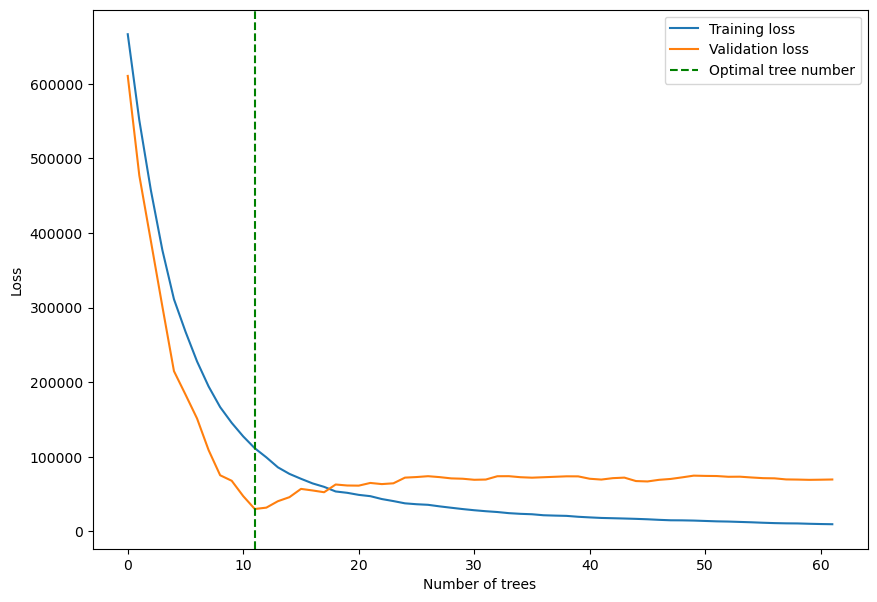

In [21]:
results = reg.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["rmse"], label="Training loss")
plt.plot(results["validation_1"]["rmse"], label="Validation loss")
plt.axvline(11,color='green',ls='--', label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

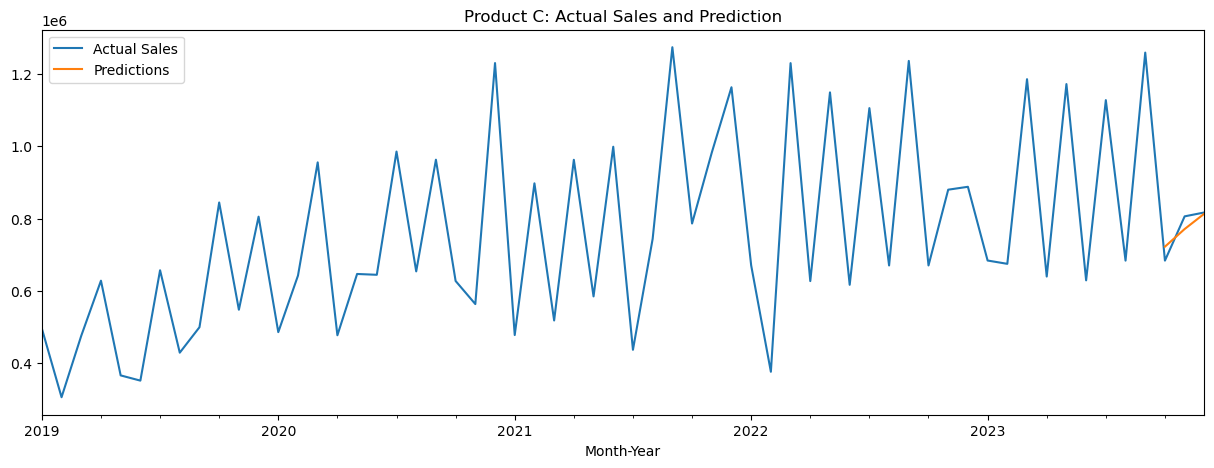

In [22]:
pred=reg.predict(x_test)
sales_c['prediction']=[None]*len(train) + list(pred)

ax = sales_c['Sales'].plot(figsize=(15, 5))
sales_c['prediction'].plot()
plt.legend(['Actual Sales', 'Predictions'])
ax.set_title('Product C: Actual Sales and Prediction')
plt.show()

In [23]:
mae_xgb= mean_absolute_error(test['Sales'],pred)
mse_xgb=mean_squared_error(test['Sales'], pred)
mape_xgb= mean_absolute_percentage_error(test['Sales'],pred)
rmse_xgb= np.sqrt(mean_squared_error(test['Sales'],pred))

print(f'MAE - XGBoost: {mae_xgb:0.3f}')
print(f'MAPE - XGBoost: {mape_xgb:0.3f}')
print(f'MSE - XGBoost: {mse_xgb:0.3f}')
print(f'RMSE - XGBoost: {rmse_xgb:0.3f}')

MAE - XGBoost: 25624.417
MAPE - XGBoost: 0.035
MSE - XGBoost: 908178971.706
RMSE - XGBoost: 30136.008


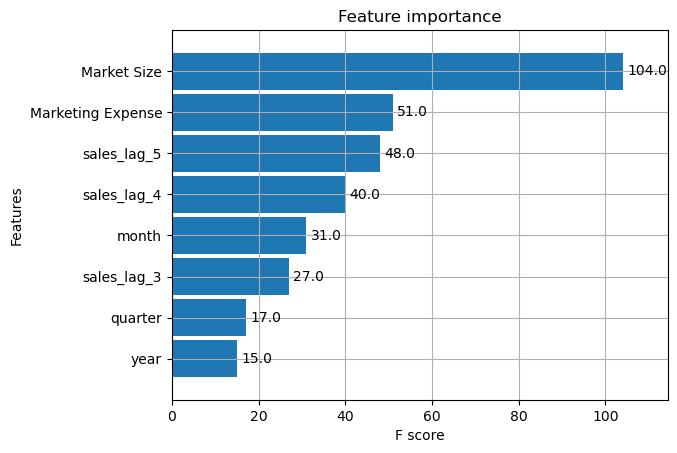

In [24]:
from xgboost import plot_importance

_ = plot_importance(reg, height=0.9)